# Практична 4. Аналіз і візуалізація даних на основі OpenStreetMap. Виконав Гречин Андрій

In [1]:
!pip install osmnx networkx matplotlib folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


## Частина 1. Візуалізація даних на основі OpenStreetMap

In [4]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium

a. Завантажте карту довільного міста (рекомендується: Львів) з OpenStreetMap.

In [8]:
city = "Lviv, Ukraine"
G = ox.graph_from_place(city, network_type='drive')

b. Відобразіть вуличну мережу міста.

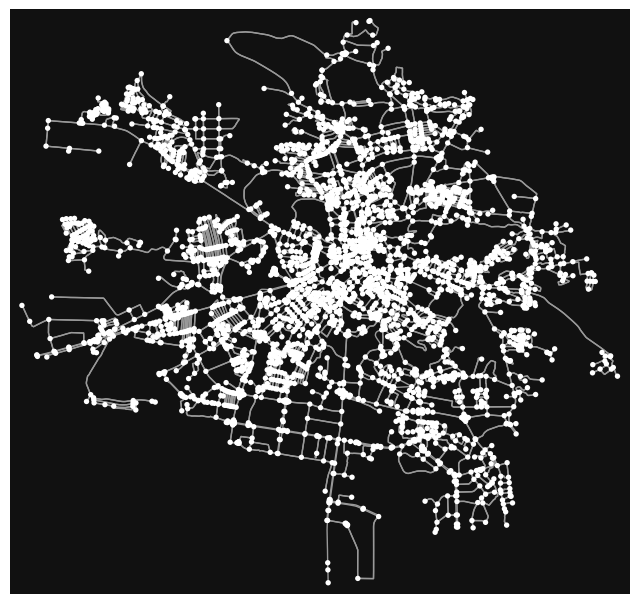

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
ox.plot_graph(G)

c. Побудуйте графіки:
1. гістограму довжин вуличних сегментів;
2. стовпчикову діаграму розподілу кількості з’єднань вузлів (ступенів);
3. точкову діаграму залежності довжини сегментів від типу дороги;
4. boxplot порівняння довжин доріг за типами.


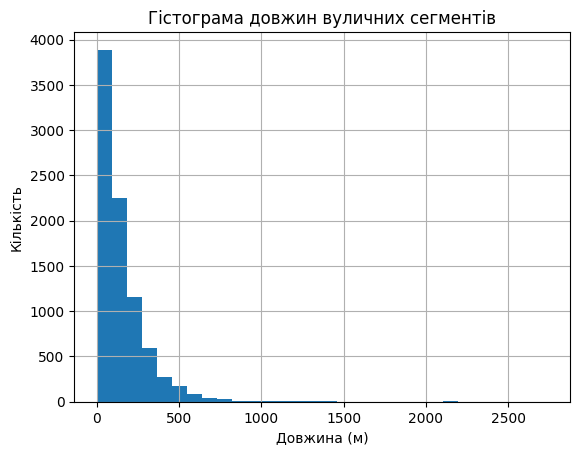

In [8]:
# 1) гістограма довжин вуличних сегментів

edges = ox.graph_to_gdfs(G, nodes=False)
edges['length'].hist(bins=30)
plt.title("Гістограма довжин вуличних сегментів")
plt.xlabel("Довжина (м)")
plt.ylabel("Кількість")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


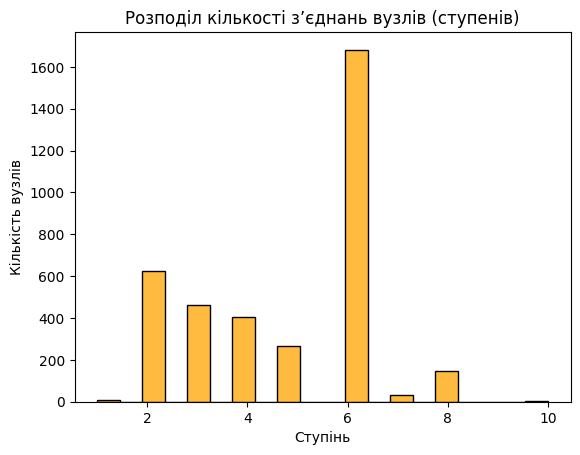

In [9]:
# 2) Розподіл ступенів вузлів

degrees = dict(G.degree())
sns.histplot(list(degrees.values()), bins=20, color='orange')
plt.title("Розподіл кількості з’єднань вузлів (ступенів)")
plt.xlabel("Ступінь")
plt.ylabel("Кількість вузлів")
plt.show()

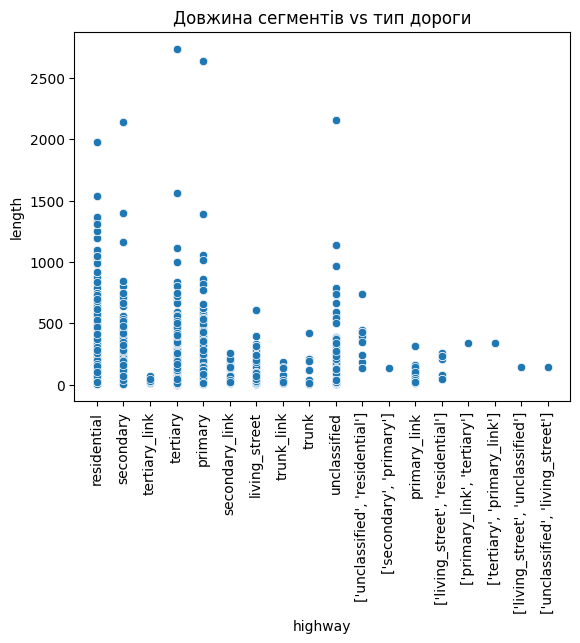

In [10]:
# 3) Залежність довжини сегмента від типу дороги

edges['highway'] = edges['highway'].astype(str)
sns.scatterplot(data=edges, x="highway", y="length")
plt.xticks(rotation=90)
plt.title("Довжина сегментів vs тип дороги")
plt.show()

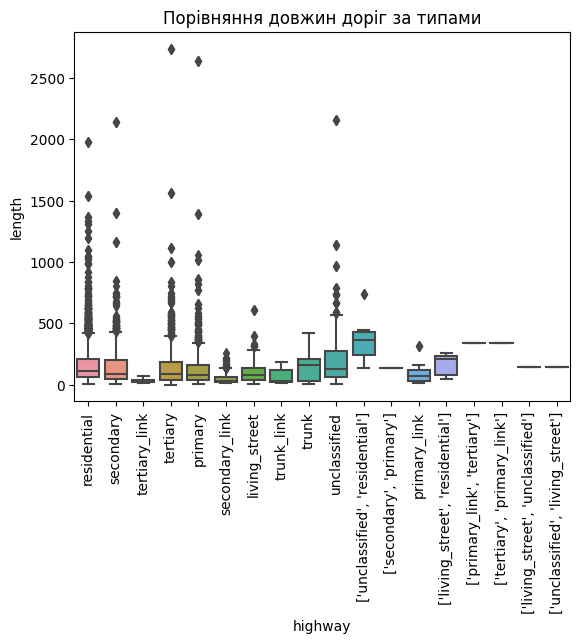

In [11]:
# 4) Boxplot за типами доріг

sns.boxplot(data=edges, x="highway", y="length")
plt.xticks(rotation=90)
plt.title("Порівняння довжин доріг за типами")
plt.show()

## Частина 2. Робота з геоданими

a. Завантажте набір просторових даних з OpenStreetMap або створіть його вручну.

In [24]:
import geopandas as gpd
from shapely.geometry import Point

data = [
    {'name': 'Вокзал',             'geometry': Point(23.99444, 49.83972)},
    {'name': 'Університет',        'geometry': Point(24.02207, 49.84015)},
    {'name': 'Музей',              'geometry': Point(24.02830, 49.84300)},
    {'name': 'Оперний театр',      'geometry': Point(24.03190, 49.84142)},
    {'name': 'Високий замок',      'geometry': Point(24.04290, 49.83105)},
    {'name': 'Арсенал',            'geometry': Point(24.02315, 49.83815)},
    {'name': 'Площа Ринок',        'geometry': Point(24.03172, 49.84130)},
    {'name': 'Костел Бернардинів','geometry': Point(24.03305, 49.84248)},
    {'name': 'ТЦ Форум Львів',           'geometry': Point(24.02550, 49.84310)},
    {'name': 'Личаківський цвинтар','geometry': Point(24.04122, 49.83324)}
]
points = gpd.GeoDataFrame(data, crs="EPSG:4326")


b. Відобразьте на карті щонайменше три точкові об'єкти (наприклад: вокзал, університет, музей).

<Axes: >

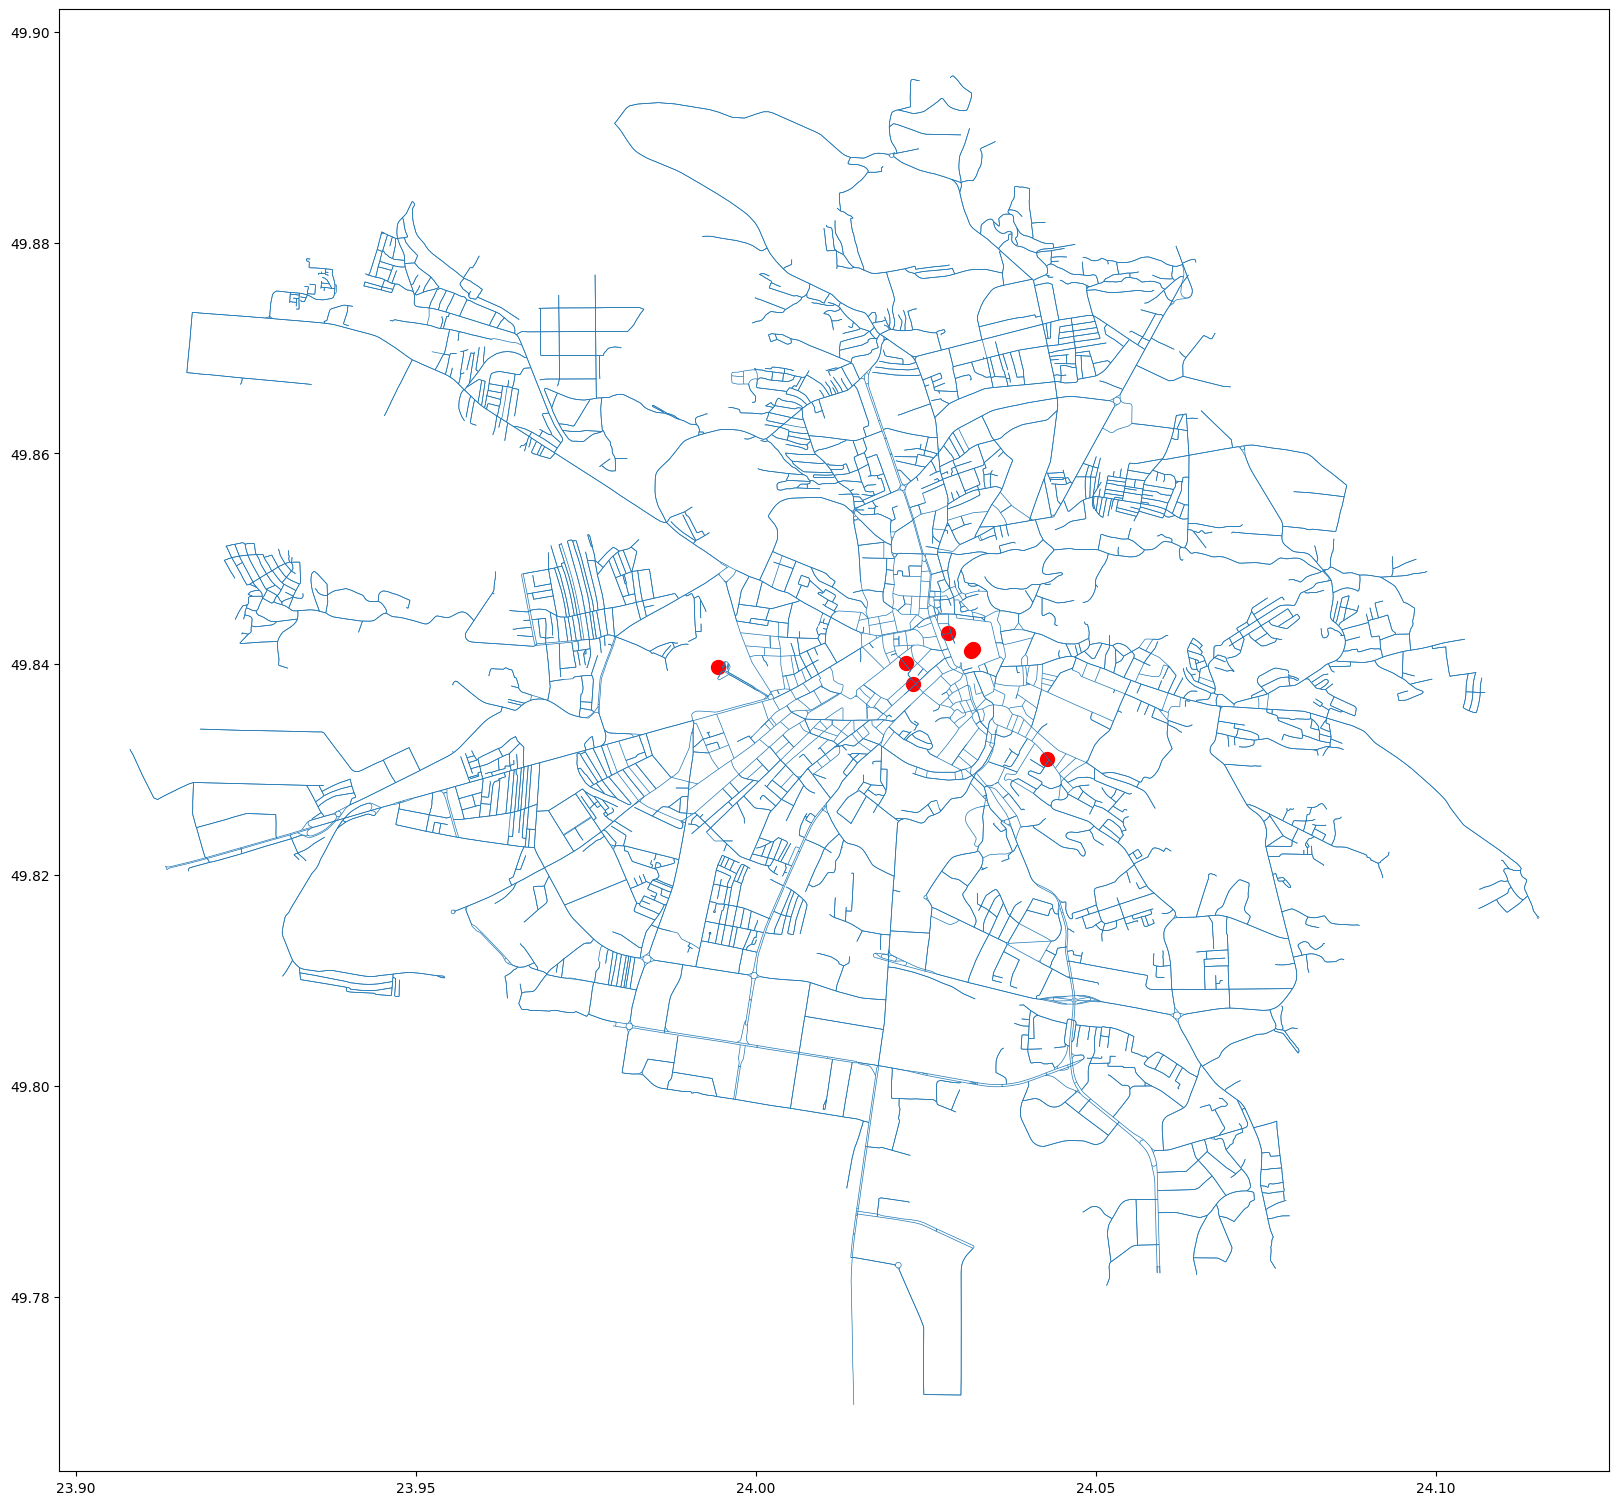

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 25))
edges.plot(ax=ax, linewidth=0.5)
points.plot(ax=ax, color='red', markersize=100)


c. Побудуйте просту карту з геометричними об'єктами на основі координат за допомогою відповідних інструментів.

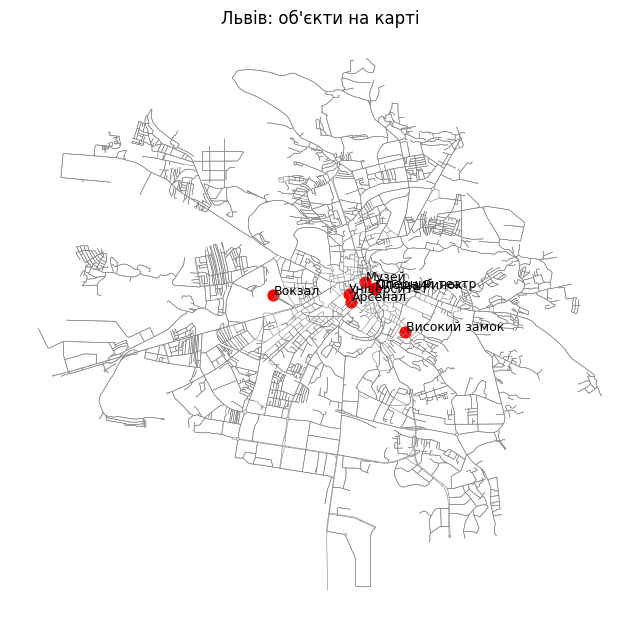

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
edges.plot(ax=ax, linewidth=0.4, color='gray')
points.plot(ax=ax, color='red', markersize=60)

for idx, row in points.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x+0.0002, y+0.0002, row['name'], fontsize=9)
    
plt.title("Львів: об'єкти на карті")
plt.axis('off')
plt.show()


d.	Візуалізуйте отримані дані на тлі міської карти.

In [31]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 84.8 MB/s eta 0:00:00:00:0100:01


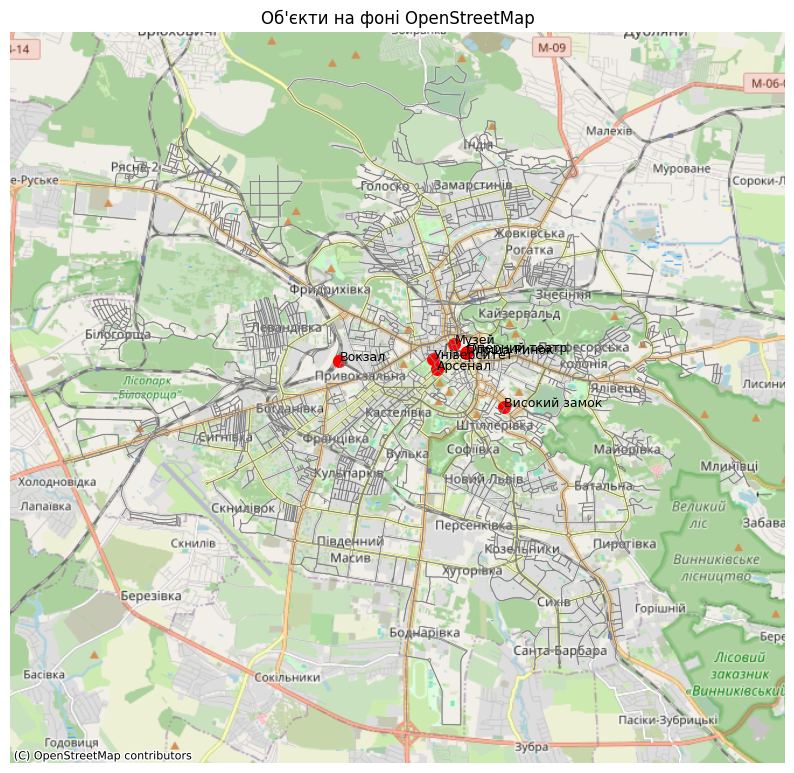

In [32]:
import contextily as ctx

points_web = points.to_crs(epsg=3857)
edges_web = edges.to_crs(epsg=3857)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

edges_web.plot(ax=ax, linewidth=0.5, color='gray')
points_web.plot(ax=ax, color='red', markersize=70)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

for idx, row in points_web.iterrows():
    ax.text(row.geometry.x + 10, row.geometry.y + 10, row['name'], fontsize=9)

plt.axis('off')
plt.title("Об'єкти на фоні OpenStreetMap")
plt.show()


## Частина 3. Побудова маршрутів

a.	Виберіть два довільні об’єкти на мапі (наприклад, вокзал і театр).

In [34]:
orig_node = ox.nearest_nodes(G, 23.99444, 49.83972)  # Вокзал
dest_node = ox.nearest_nodes(G, 24.0283, 49.8430)    # Музей

b.	Побудуйте найкоротший маршрут між ними.

In [37]:
import networkx as nx

route = nx.shortest_path(G, orig_node, dest_node, weight='length')

c.	Відобразіть цей маршрут на карті.

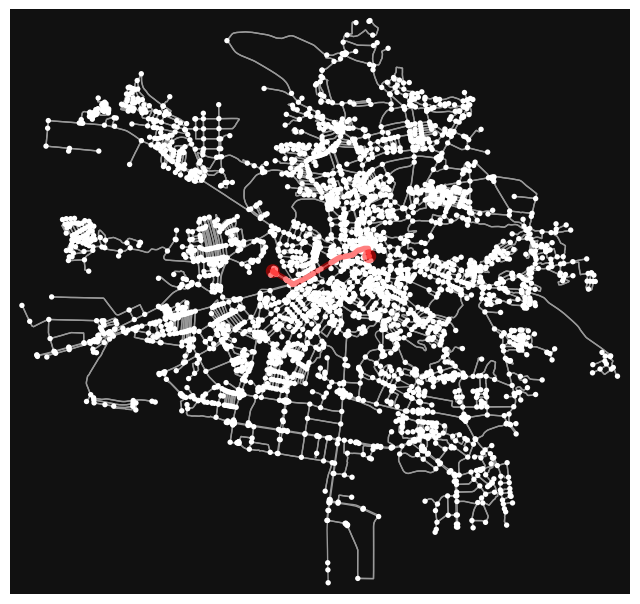

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [38]:
ox.plot_graph_route(G, route)

d.	Побудуйте щонайменше два альтернативні маршрути та порівняйте їх довжину.

In [41]:
from networkx.algorithms.simple_paths import all_simple_paths

paths = list(all_simple_paths(G, orig_node, dest_node, cutoff=20))[:2]
for path in paths:
    ox.plot_graph_route(G, path)

## Частина 4. Оптимізація маршруту (задача комівояжера)

a.	Виберіть 10 історико-культурних об’єктів у місті.

In [58]:
G_undirected = G.to_undirected()

In [59]:
historic_data = [
    {'name': 'Вокзал',               'geometry': Point(23.99444, 49.83972)},
    {'name': 'Парк Івана Франка',    'geometry': Point(24.01200, 49.84250)},
    {'name': 'Палац мистецтв',       'geometry': Point(24.03150, 49.83880)},
    {'name': 'Львівський театр опери','geometry': Point(24.03195, 49.84150)},
    {'name': 'Парк Високий Замок',  'geometry': Point(24.04600, 49.83000)},
    {'name': 'Палац Потоцьких',      'geometry': Point(24.03111, 49.84220)},
    {'name': 'Вулиця Коперника',     'geometry': Point(24.03280, 49.84390)},
    {'name': 'Площа Свободи',        'geometry': Point(24.03030, 49.84370)},
    {'name': 'Церква Святого Юра',   'geometry': Point(24.03620, 49.83980)},
    {'name': 'Львівський національний університет', 'geometry': Point(24.02150, 49.83990)}
]

points = gpd.GeoDataFrame(historic_data, crs="EPSG:4326")

b.	Розрахуйте оптимальний маршрут, що починається і закінчується на вокзалі та проходить через усі об’єкти.

In [70]:
from networkx.algorithms import approximation as approx

route_nodes = [ox.distance.nearest_nodes(G_undirected, point.geometry.x, point.geometry.y) for point in points.itertuples()]

tsp_route = approx.traveling_salesman_problem(G_undirected, nodes=route_nodes, cycle=True, method=approx.greedy_tsp)

def route_length_correct(G, route, weight='length'):
    length = 0
    for u, v in zip(route[:-1], route[1:]):
        length += nx.shortest_path_length(G, u, v, weight=weight)
    return length

print(f"Довжина оптимального маршруту: {route_length_correct(G_undirected, tsp_route):.2f} метрів")

print("Оптимальний (приблизний) маршрут TSP вузлів:")
print(tsp_route)

Довжина оптимального маршруту: 13181.64 метрів
Оптимальний (приблизний) маршрут TSP вузлів:
[1728998938, 7721800172, 7042886437, 8681306600, 8681306444, 1832279788, 1728998903, 374455234, 374454680, 374460109, 374457761, 528902592, 374457756, 374458741, 374454287, 10231726189, 374457743, 3648530049, 374457094, 374456802, 374457100, 528898696, 2558995302, 30511642, 30511640, 254913034, 30518797, 254913244, 254913252, 30518794, 30518766, 30521793, 268680976, 30524109, 261713414, 476664787, 261713449, 8032576262, 475621854, 8032576262, 4753743619, 261713450, 30521796, 30518784, 476665669, 476665666, 3698484594, 476665666, 476666190, 476666191, 1652719433, 30520860, 476664020, 30524119, 30524789, 30524129, 30524132, 254856964, 254856963, 366686396, 506717983, 506717985, 507137992, 506717986, 506717992, 358406682, 358406681, 424486523, 356263763, 1766626987, 356263764, 1766626987, 356263763, 343074587, 335990102, 384966502, 335990022, 335990021, 335990018, 341101739, 384964842, 341099873, 3

c.	Відобразіть цей маршрут на карті міста.

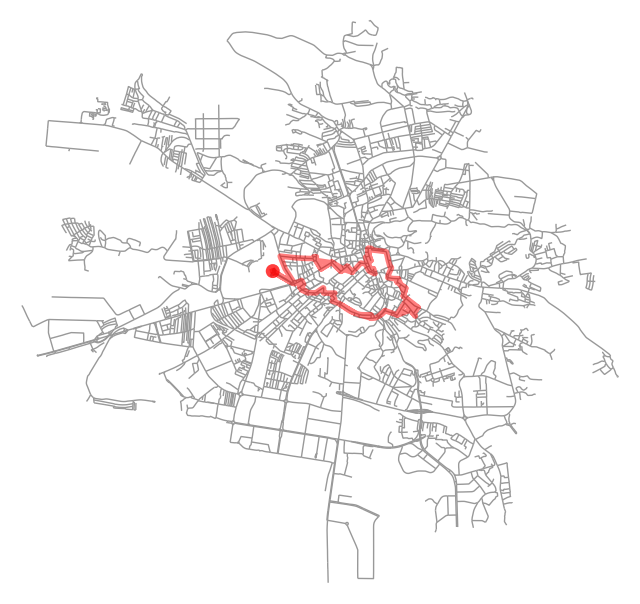

In [65]:
fig, ax = ox.plot_graph_route(G_undirected, tsp_route, route_linewidth=4, node_size=0, bgcolor='white')

d.	Порівняйте довжину маршруту з довільним (неоптимізованим) порядком проходження точок.

In [71]:
random_route = route_nodes.copy()
random.shuffle(random_route)
random_route.append(random_route[0])

print(f"Довжина випадкового маршруту: {route_length_correct(G_undirected, random_route):.2f} метрів")

Довжина випадкового маршруту: 15798.49 метрів


## Частина 5. Інтерактивна карта (опціонально)

a.	Створіть інтерактивну карту з маркерами для щонайменше п’яти об’єктів.

In [62]:
import folium

m = folium.Map(location=[49.839, 24.029], zoom_start=13)


b.	Додайте маршрути та підписи для об’єктів.

In [63]:
for name, lat, lon in zip(points['name'], points.geometry.y, points.geometry.x):
    folium.Marker([lat, lon], popup=name).add_to(m)


c.	Збережіть або поділіться результатом у вигляді HTML-файлу або скріншотів.

In [64]:
m.save("interactive_map.html")
